**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: KEVIN BALDERAS SÁNCHEZ
*   MATRÍCULA: A01795149


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
rows = air_df.shape[0]
cols = air_df.shape[1]
print('1-Las dimensiones del dataset son: {} filas y  {} columnas'.format(rows,cols))
print()
print('2-Los primeros 5 registros del dataset se muestran a continuación: \n')
print(air_df.head(5))
print()
print('3-Los últimos 5 registros del dataset se muestran a continuación: \n')
print(air_df.tail(5))
print()
print('4-Luego, el nombre de las columnas se muestra a continuación (en forma de lista): \n')
print(air_df.columns.values)
print()
print('5-Después, el tipo de dato de cada columna se muestra: \n')
print(air_df.dtypes)
print()
print('6-Por último, el porcentaje de valores faltantes por columna: \n')
print(air_df.isnull().sum()/rows*100)
print()
print('Vemos que la columna que tiene valores faltantes es la de Value con un 7.37%')

1-Las dimensiones del dataset son: 43800 filas y  6 columnas

2-Los primeros 5 registros del dataset se muestran a continuación: 

  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R

3-Los últimos 5 registros del dataset se muestran a continuación: 

      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31/12/2017 22:00    5.0  ug m-3             

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [12]:
air_df_unique =air_df.nunique() 
print('La cantidad de valores únicos por columna es: \n')
print(air_df_unique)
print()
print('El conteo total de mediciones fue: {}\n'.format(rows))
print()
print('Los contaminantes del aire que se analizaron fueron {}\n'.format(air_df_unique[1]))
print()
cols_same_info = air_df_unique[air_df_unique==1]
print('Las columnas que tienen mismo valor en todos los registro son: {}\n'.format(list(cols_same_info.index)))
print()
print('Para la columna Units, los valores son: {} que por valor es el mismo, sólo que diferente formato\n'.format(air_df.Units.unique()))
print()

print('Luego de eliminar columnas no relevante, tenemos:\n')
air_df = air_df.drop(columns = ['Site','Provisional or Ratified','Units'])
print(air_df.head(5))

La cantidad de valores únicos por columna es: 

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

El conteo total de mediciones fue: 43800


Los contaminantes del aire que se analizaron fueron 5


Las columnas que tienen mismo valor en todos los registro son: ['Site', 'Provisional or Ratified']


Para la columna Units, los valores son: ['ug m-3' 'ug m-3 as NO2' 'ug/m3'] que por valor es el mismo, sólo que diferente formato


Luego de eliminar columnas no relevante, tenemos:

  Species   ReadingDateTime  Value
0      NO  01/01/2017 00:00    3.5
1      NO  01/01/2017 01:00    3.6
2      NO  01/01/2017 02:00    2.2
3      NO  01/01/2017 03:00    2.1
4      NO  01/01/2017 04:00    3.3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [13]:
print('Como del inciso anterior tenemos que los registros fueron {}\n'.format(rows))
print()
value_speci = air_df.Species.value_counts()
print(value_speci)
print()
print('Tenemos que la suma de valores por categoria de species es : {}\n'.format(value_speci.sum()))
print()

Como del inciso anterior tenemos que los registros fueron 43800


PM10     8760
NO       8760
NOX      8760
NO2      8760
PM2.5    8760
Name: Species, dtype: int64

Tenemos que la suma de valores por categoria de species es : 43800




4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [14]:
air_df.groupby(['Species']).mean('Value')

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [15]:
pvt_df = air_df.pivot(index='ReadingDateTime',columns='Species')
pvt_df.head(5)

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [16]:
air_description = pvt_df.describe()
print(air_description)
print()

print('El mayor valor de NO2 registrado fue {}'.format(air_description.values[-1][1]))
date_max_no2 = pvt_df[pvt_df['Value']['NO2']==120.2].index[0]
print('Con fecha de: {}\n'.format(date_max_no2))

print('El menor valor de PM10 registrado fue {}'.format(air_description.values[3][3]))
date_min_pm10 = pvt_df[pvt_df['Value']['PM10']==-5.60].index[0]
print('Con fecha de: {}\n'.format(date_min_pm10))

print('La mediana de NO registrado fue {}'.format(air_description.values[-3][0]))
print('El segundo cuartil es la mediana en sí, puesto que representa punto donde se encuentra el 50% los datos\n')


print('El primer cuartil de PM2.5 registrado fue {}'.format(air_description.values[-4][-1]))
print('El primer cuartil representa punto donde se encuentra el 25% los datos.')
print('Es decir, a partir de ese dato, en adelante, se encuentra el otro 75% de los datos')


               Value                                                    
Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000

El mayor valor de NO2 registrado fue 120.2
Con fecha de: 24/01/2017 19:00

El menor valor de PM10 registrado fue -5.6
Con fecha de: 12/09/2017 23:00

La mediana de NO registrado fue 7.1
El segundo cuartil es la mediana en sí, puesto que representa punto donde se encuen

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

Solo de ver los histogramos vemos que el contaminante con mayor variabilidad estan entre NO, NOX y PM10
El NOX es el de mayor variabilidad por el histograma y la información de inciso anterior con la desviacion estandar de 61
Pues podriamos argumentar que el NO también presenta variabilididad, pero está más acotada por el rango de valores



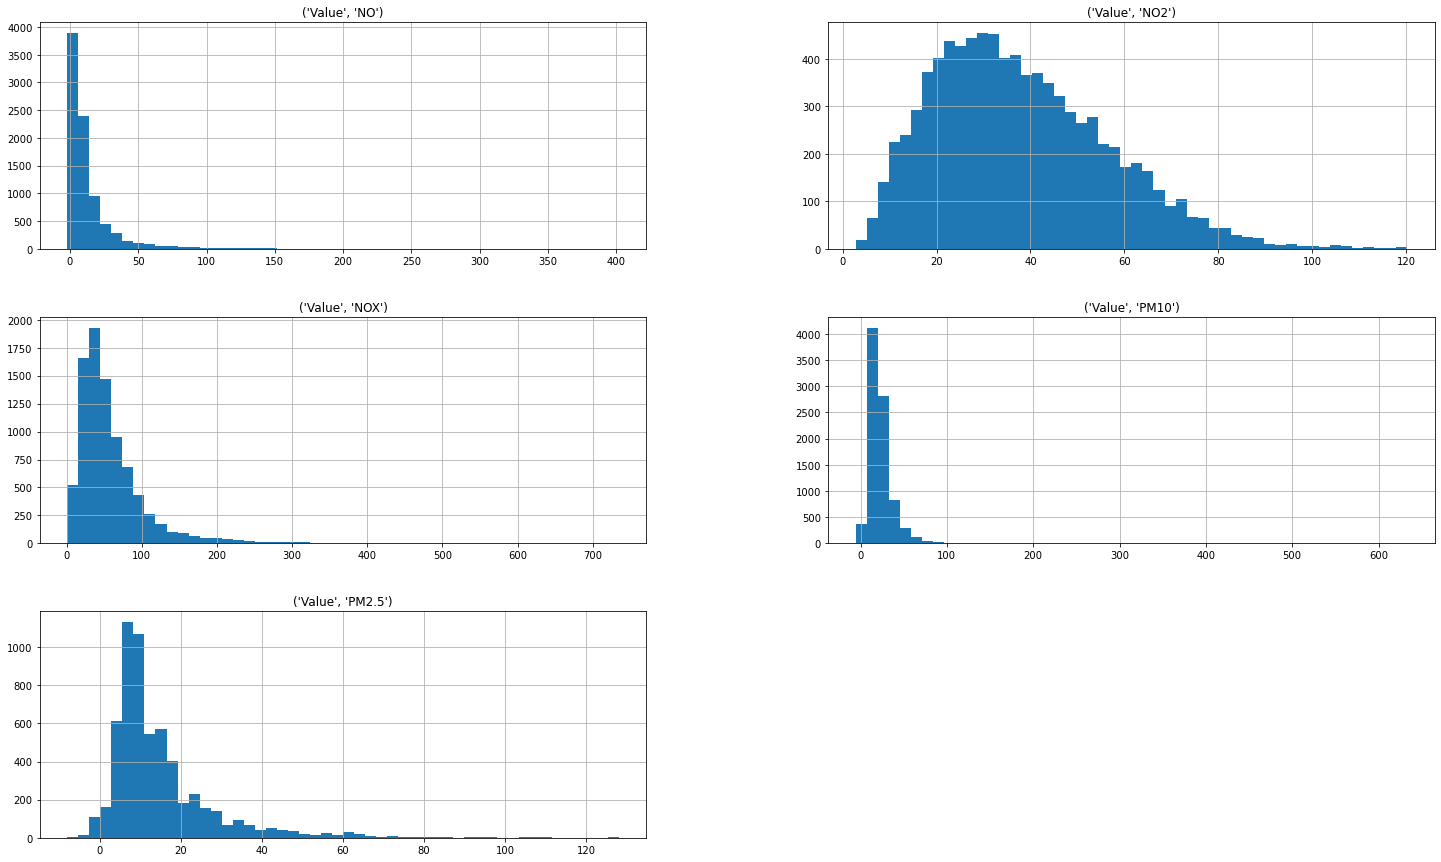

In [17]:
%matplotlib inline
print("Solo de ver los histogramos vemos que el contaminante con mayor variabilidad estan entre NO, NOX y PM10")
print('El NOX es el de mayor variabilidad por el histograma y la información de inciso anterior con la desviacion estandar de 61')
print("Pues podriamos argumentar que el NO también presenta variabilididad, pero está más acotada por el rango de valores")
print('')
pvt_df.hist(bins=50,figsize=(25,15))
plt.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [18]:
#Divide el contenido de la columna ReadingDateTime por el espacio entre el contenido y hace nuevas columnas de dicha división
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) 
#Renombra columnas resultantes de la division anterior como Date y Time
datetime_df.columns = ['Date','Time']
#Nuevo dataset con columnas Date y Time
datetime_df
#Ahora dividimos la columna Date usando el caracter / como separador
date_df = datetime_df.Date.str.split('/',expand=True)
#Renombra dicha división anterior con columnas como Day, Month y Year
date_df.columns = ['Day','Month','Year']
#Nuevo dataset con columnas Day,Month,Year
date_df
#Ahora hacemos un nuevo dataframe, uniendo el air_df original junto con el datetime_df y el date_df
#Por último, borramos columnas de ReadingDateTime y Year
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Nuevos indices
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [19]:
print('Como el comando unstack trabaja con los indices y se encarga de hacer un formato wide')
print('Sabiendo eso y que del inciso anterior tenemos como indices a Dia, Mes, Tiempo y Especie')
print('El comando permite que Especie pase a columna para cada valor y así tener un formato amplio')
air_df.unstack()

Como el comando unstack trabaja con los indices y se encarga de hacer un formato wide
Sabiendo eso y que del inciso anterior tenemos como indices a Dia, Mes, Tiempo y Especie
El comando permite que Especie pase a columna para cada valor y así tener un formato amplio


Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Se puede decir que melt hace un unpivot de un dataframe, convirtiendolo asi de un wide format a un long format. Mientras que el par melt/pivot trabajan a nivel de dataframe, el par stack/unstack trabaja a nivel de indice. Si tenemos un dataframe con dos columnas como indice, el comando unstack, empuja el nivel más interno en el orden de los indices y lo hace columna (dando un formato wide). Por la parte contraria, el comando stack, empuja una columna para que sea indice, haciendo asi un formato long. Entonces, debido a lo anterior, la contraparte de melt entre stack o unstack sería el unstack, debido a que su parte equivalente es stack.